In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import glob
from matplotlib import rcParams
import matplotlib.ticker as ticker
from matplotlib.colors import hsv_to_rgb



os.environ['PATH'] += ':/Library/TeX/texbin'
rcParams['text.usetex'] = True
rcParams['font.family'] = "Times New Roman"
font_size = 30

rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15


rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.width'] = 1
rcParams['xtick.major.size'] = 4
rcParams['xtick.minor.size'] = 0

rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.width'] = 1
rcParams['ytick.major.size'] = 4
rcParams['ytick.minor.size'] = 0

rcParams['ytick.right'] = True
rcParams['ytick.labelright'] = False
rcParams['xtick.top'] = True
rcParams['xtick.labeltop'] = False

rcParams['axes.labelsize'] = 15
rcParams['axes.edgecolor'] = 'black'
rcParams['axes.linewidth'] = 1.1
rcParams['axes.xmargin'] = 0.01
rcParams['axes.spines.top'] = True
rcParams["axes.axisbelow"]  = False
rcParams["boxplot.meanline"] = True 
rcParams['legend.frameon'] = False
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

In [3]:
fileNames = glob.glob('escape_prob_*_combined.txt')
print(fileNames)

['escape_prob_L4000_lambda1.00_combined.txt', 'escape_prob_L2000_lambda1.00_combined.txt', 'escape_prob_L500_lambda1.00_combined.txt', 'escape_prob_L250_lambda1.00_combined.txt', 'escape_prob_L1000_lambda1.00_combined.txt']


In [10]:
data_dict = {}
L_list = []
for fileName in fileNames:
    data = np.loadtxt(fileName)
    L = int(fileName.split('_')[2][1:])
    print(L)
    L_list.append(L)
    data_dict[L] = data

L_list.sort()

4000
2000
500
250
1000


## Previously xlabel was $p$ which is now changed to $\lambda$.
Structure of the data file:

$p$ | Escape Probability | Std Error (can be ignored)
---| ----| ---|
1.95| 0.2 | 0.001

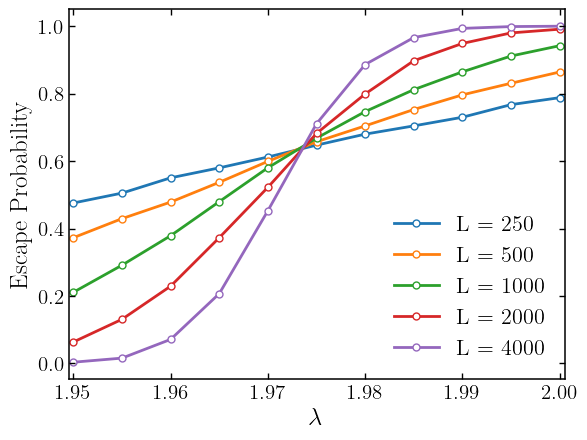

In [29]:
for L in L_list:
    lambdas = data_dict[L][:, 0]
    escape_probs = data_dict[L][:, 1]
    std_errors = data_dict[L][:, 2]
    plt.plot(lambdas, escape_probs, 'o-', label=f'L = {L}', lw=2, markersize=5, markerfacecolor='white', markeredgewidth=1,)



plt.xlabel(r'$\lambda$', fontsize=18)
plt.ylabel('Escape Probability', fontsize=18)
plt.legend(fontsize=16)
plt.savefig('escape_prob_vs_lambda.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
fileNames = glob.glob('escape_prob_lambda_scan_*.txt')
print(fileNames)

['escape_prob_lambda_scan_L250_p1.00.txt', 'escape_prob_lambda_scan_L1000_p1.00.txt', 'escape_prob_lambda_scan_L4000_p1.00.txt', 'escape_prob_lambda_scan_L500_p1.00.txt', 'escape_prob_lambda_scan_L2000_p1.00.txt']


In [14]:
data_dict = {}
L_list = []
for fileName in fileNames:
    data = np.loadtxt(fileName)
    L = int(fileName.split('_')[4][1:])
    print(L)
    L_list.append(L)
    data_dict[L] = data

L_list.sort()

250
1000
4000
500
2000


## $\lambda$ in code is replaced by $\alpha$ in the xlabel
Structure of the data file:

$\alpha$ | Escape Probability
---| ----|
0.26| 0.9 |

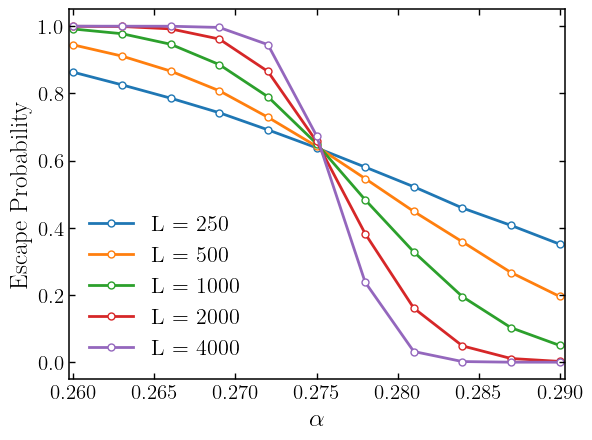

In [15]:
for L in L_list:
    alphas = data_dict[L][:, 0]
    escape_probs = data_dict[L][:, 1]
    plt.plot(alphas, escape_probs, 'o-', label=f'L = {L}', lw=2, markersize=5, markerfacecolor='white', markeredgewidth=1,)



plt.xlabel(r'$\alpha$', fontsize=18)
plt.ylabel('Escape Probability', fontsize=18)
plt.legend(fontsize=16)
plt.savefig('escape_prob_vs_alpha.pdf', dpi=300, bbox_inches='tight')
plt.show()
